# Hello World

In [50]:
import tensorflow as tf

#Simple hello world using TensorFlow

# Create a Constant op
# The op is added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
hello = tf.constant('Hello, TensorFlow!')

# Start tf session
sess = tf.Session()

print sess.run(hello)

Hello, TensorFlow!


# Math

In [1]:
import tensorflow as tf

a = tf.placeholder("float") # Create a symbolic variable 'a'
b = tf.placeholder("float") # Create a symbolic variable 'b'

y = tf.mul(a, b) # multiply the symbolic variables

sess = tf.Session() # create a session to evaluate the symbolic expressions

print "%f should equal 2.0" % sess.run(y, feed_dict={a: 1, b: 2}) # eval expressions with parameters for a and b
print "%f should equal 9.0" % sess.run(y, feed_dict={a: 3, b: 3})

2.000000 should equal 2.0
9.000000 should equal 9.0


In [51]:
import tensorflow as tf

# Basic constant operations
# The value returned by the constructor represents the output
# of the Constant op.
a = tf.constant(2)
b = tf.constant(3)

# Launch the default graph.
with tf.Session() as sess:
    print "a=2, b=3"
    print "Addition with constants: %i" % sess.run(a+b)
    print "Multiplication with constants: %i" % sess.run(a*b)

# Basic Operations with variable as graph input
# The value returned by the constructor represents the output
# of the Variable op. (define as input when running session)
# tf Graph input
a = tf.placeholder(tf.types.int16)
b = tf.placeholder(tf.types.int16)

# Define some operations
add = tf.add(a, b)
mul = tf.mul(a, b)

# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print "Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3})
    print "Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3})


# ----------------
# More in details:
# Matrix Multiplication from TensorFlow official tutorial

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

# To run the matmul op we call the session 'run()' method, passing 'product'
# which represents the output of the matmul op.  This indicates to the call
# that we want to get the output of the matmul op back.
#
# All inputs needed by the op are run automatically by the session.  They
# typically are run in parallel.
#
# The call 'run(product)' thus causes the execution of threes ops in the
# graph: the two constants and matmul.
#
# The output of the op is returned in 'result' as a numpy `ndarray` object.
with tf.Session() as sess:
    result = sess.run(product)
    print result
    # ==> [[ 12.]]

a=2, b=3
Addition with constants: 5
Multiplication with constants: 6
Addition with variables: 5
Multiplication with variables: 6
[[ 12.]]


## Linear Regression

In [14]:
import tensorflow as tf
import numpy as np

trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 # create a y value which is approximately linear but with some random noise

X = tf.placeholder("float") # create symbolic variables
Y = tf.placeholder("float")


def model(X, w):
    return tf.mul(X, w) # lr is just X*w so this model line is pretty simple


w = tf.Variable(0.0, name="weights") # create a shared variable (like theano.shared) for the weight matrix
y_model = model(X, w)

cost = (tf.pow(Y-y_model, 2)) # use sqr error for cost function

train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost) # construct an optimizer to minimize cost and fit line to my data

sess = tf.Session()
init = tf.initialize_all_variables() # you need to initialize variables (in this case just variable W)
sess.run(init)

for i in range(100):
    for (x, y) in zip(trX, trY): 
        sess.run(train_op, feed_dict={X: x, Y: y})

print(sess.run(w))  # something around 2

2.01006


Epoch: 0001 cost= 56.338920593 W= -1.05473 b= -1.22105
Epoch: 0051 cost= 0.254395306 W= 0.485045 b= -0.892357
Epoch: 0101 cost= 0.233900949 W= 0.471042 b= -0.791617
Epoch: 0151 cost= 0.215773210 W= 0.457871 b= -0.696869
Epoch: 0201 cost= 0.199738681 W= 0.445484 b= -0.607756
Epoch: 0251 cost= 0.185555816 W= 0.433834 b= -0.523944
Epoch: 0301 cost= 0.173010752 W= 0.422876 b= -0.445116
Epoch: 0351 cost= 0.161914438 W= 0.41257 b= -0.370976
Epoch: 0401 cost= 0.152099639 W= 0.402877 b= -0.301245
Epoch: 0451 cost= 0.143418401 W= 0.393761 b= -0.235662
Epoch: 0501 cost= 0.135739803 W= 0.385187 b= -0.173979
Epoch: 0551 cost= 0.128948092 W= 0.377122 b= -0.115965
Epoch: 0601 cost= 0.122940958 W= 0.369537 b= -0.0614008
Epoch: 0651 cost= 0.117627747 W= 0.362404 b= -0.010082
Epoch: 0701 cost= 0.112928316 W= 0.355694 b= 0.0381847
Epoch: 0751 cost= 0.108771816 W= 0.349384 b= 0.0835807
Epoch: 0801 cost= 0.105095580 W= 0.343449 b= 0.126277
Epoch: 0851 cost= 0.101844095 W= 0.337867 b= 0.166434
Epoch: 0901 

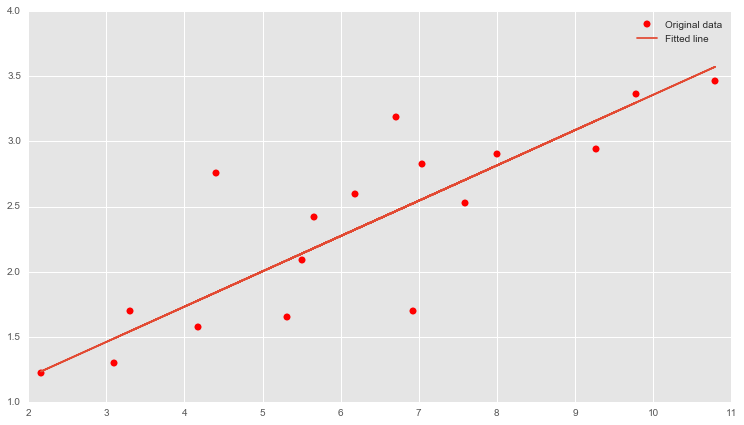

In [52]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
activation = tf.add(tf.mul(X, W), b)

# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [15]:
import tensorflow as tf
import numpy as np
import input_data


def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def model(X, w):
    return tf.matmul(X, w) # notice we use the same model as linear regression, this is because there is a baked in cost function which performs softmax and cross entropy


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

X = tf.placeholder("float", [None, 784]) # create symbolic variables
Y = tf.placeholder("float", [None, 10])

w = init_weights([784, 10]) # like in linear regression, we need a shared variable weight matrix for logistic regression

py_x = model(X, w)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y)) # compute mean cross entropy (softmax is applied internally)
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct optimizer
predict_op = tf.argmax(py_x, 1) # at predict time, evaluate the argmax of the logistic regression

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

for i in range(100):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
    print i, np.mean(np.argmax(teY, axis=1) ==
                     sess.run(predict_op, feed_dict={X: teX, Y: teY}))

Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0 0.8839
1 0.8966
2 0.9029
3 0.9076
4 0.9103
5 0.9108
6 0.9121
7 0.9134
8 0.9152
9 0.9154
10 0.9163
11 0.9168
12 0.917
13 0.9171
14 0.9174
15 0.9177
16 0.9183
17 0.9187
18 0.919
19 0.9195
20 0.9197
21 0.9198
22 0.9201
23 0.9204
24 0.9203
25 0.9206
26 0.9207
27 0.9209
28 0.921
29 0.9214
30 0.9216
31 0.9219
32 0.9217
33 0.9215
34 0.9214
35 0.9215
36 0.9215
37 0.9216
38 0.922
39 0.922
40 0.922
41 0.9217
42 0.9217
43 0.9219
44 0.9221
45 0.9219
46 0.9219
47 0.922
48 0.922
49 0.9218
50 0.9217
51 0.9219
52 0.9221
53 0.9224
54 0.9226
55 0.9226
56 0.9225
5

## Net

In [16]:
import tensorflow as tf
import numpy as np
import input_data


def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def model(X, w_h, w_o):
    h = tf.nn.sigmoid(tf.matmul(X, w_h)) # this is a basic mlp, think 2 stacked logistic regressions
    return tf.matmul(h, w_o) # note that we dont take the softmax at the end because our cost fn does that for us


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])

w_h = init_weights([784, 625]) # create symbolic variables
w_o = init_weights([625, 10])

py_x = model(X, w_h, w_o)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y)) # compute costs
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct an optimizer
predict_op = tf.argmax(py_x, 1)

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

for i in range(100):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
    print i, np.mean(np.argmax(teY, axis=1) ==
                     sess.run(predict_op, feed_dict={X: teX, Y: teY}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0 0.6976
1 0.8232
2 0.8617
3 0.8802
4 0.888
5 0.8939
6 0.8977
7 0.9005
8 0.9037
9 0.906
10 0.9079
11 0.9096
12 0.9122
13 0.9126
14 0.9137
15 0.915
16 0.9154
17 0.9167
18 0.9176
19 0.9179
20 0.9186
21 0.9192
22 0.9195
23 0.9197
24 0.9203
25 0.9207
26 0.9211
27 0.9216
28 0.922
29 0.9225
30 0.9227
31 0.9233
32 0.9239
33 0.9242
34 0.925
35 0.9257
36 0.9261
37 0.9263
38 0.9268
39 0.927
40 0.9274
41 0.9276
42 0.928
43 0.9281
44 0.9288
45 0.9295
46 0.93
47 0.931
48 0.9316
49 0.9317
50 0.9323
51 0.9334
52 0.934
53 0.9347
54 0.9355
55 0.9361
56 0.9372
57 0.9379
58 0.9383
59 0.9388
60 0.9396
61 0.94
62 0.9403
63 0.9404
64 0.9409
65 0.9411
66 0.9412
67 0.9417
68 0.9423
69 0.9425
70 0.9431
71 0.9437
72 0.9442
73 0.9451
74 0.9456
75 0.946
76 0.9466
77 0.9472
78 0.9479
79 0.9488
80 0.9493
81 0.9497
82 0.9499


## Modern Net

In [17]:
import tensorflow as tf
import numpy as np
import input_data


def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def model(X, w_h, w_h2, w_o, p_drop_input, p_drop_hidden):
    # this network is the same as the previous one except with an extra hidden layer + dropout
    X = tf.nn.dropout(X, p_drop_input)
    h = tf.nn.relu(tf.matmul(X, w_h))

    h = tf.nn.dropout(h, p_drop_hidden)
    h2 = tf.nn.relu(tf.matmul(h, w_h2))

    h2 = tf.nn.dropout(h2, p_drop_hidden)

    return tf.matmul(h2, w_o)


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])

w_h = init_weights([784, 625])
w_h2 = init_weights([625, 625])
w_o = init_weights([625, 10])

p_keep_input = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")
py_x = model(X, w_h, w_h2, w_o, p_keep_input, p_keep_hidden)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y))
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

for i in range(100):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end],
                                      p_keep_input: 0.8, p_keep_hidden: 0.5})
    print i, np.mean(np.argmax(teY, axis=1) ==
                     sess.run(predict_op, feed_dict={X: teX, Y: teY,
                                                     p_keep_input: 1.0,
                                                     p_keep_hidden: 1.0}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0 0.9398
1 0.965
2 0.9698
3 0.973
4 0.9728
5 0.9773
6 0.9782
7 0.9786
8 0.9786
9 0.9783
10 0.9796
11 0.9807
12 0.9789
13 0.981
14 0.9835
15 0.9808
16 0.9806
17 0.9814
18 0.9816
19 0.9821
20 0.983
21 0.9825
22 0.9809
23 0.9814
24 0.9829
25 0.9854
26 0.9842
27 0.9835
28 0.984
29 0.9839
30 0.9838
31 0.9834
32 0.9837
33 0.9844
34 0.984
35 0.9835
36 0.9845
37 0.9842
38 0.9834
39 0.9843
40 0.9838
41 0.9844
42 0.9837
43 0.9852
44 0.9847
45 0.9844
46 0.9838
47 0.983
48 0.9846
49 0.9846
50 0.9846
51 0.9837
52 0.9855
53 0.9858
54 0.985
55 0.985
56 0.9848
57 0.9851
58 0.9848
59 0.9846
60 0.984
61 0.9834
62 0.9851
63 0.9845
64 0.9848
65 0.9854
66 0.9844
67 0.9842
68 0.9852
69 0.9841
70 0.9852
71 0.9857
72 0.9841
73 0.9844
74 0.9853
75 0.9847
76 0.9862
77 0.9858
78 0.9863
79 0.9843
80 0.9857
81 0.9863
82 0.9

## Convolutional Net

In [49]:
import tensorflow as tf
import numpy as np
import input_data


def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden):
    l1a = tf.nn.relu(tf.nn.conv2d(X, w, [1, 1, 1, 1], 'SAME'))
    l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
    l1 = tf.nn.dropout(l1, p_keep_conv)

    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2, [1, 1, 1, 1], 'SAME'))
    l2 = tf.nn.max_pool(l2a, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)

    l3a = tf.nn.relu(tf.nn.conv2d(l2, w3, [1, 1, 1, 1], 'SAME'))
    l3 = tf.nn.max_pool(l3a, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
    l3 = tf.reshape(l3, [-1, w4.get_shape().as_list()[0]])
    l3 = tf.nn.dropout(l3, p_keep_conv)

    l4 = tf.nn.relu(tf.matmul(l3, w4))
    l4 = tf.nn.dropout(l4, p_keep_hidden)

    pyx = tf.matmul(l4, w_o)
    return pyx

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
trX = trX.reshape(-1, 28, 28, 1)
teX = teX.reshape(-1, 28, 28, 1)

X = tf.placeholder("float", [None, 28, 28, 1])
Y = tf.placeholder("float", [None, 10])

w = init_weights([3, 3, 1, 32])
w2 = init_weights([3, 3, 32, 64])
w3 = init_weights([3, 3, 64, 128])
w4 = init_weights([128 * 4 * 4, 625])
w_o = init_weights([625, 10])

p_keep_conv = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")
py_x = model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y))
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

for i in range(25):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end],
                                      p_keep_conv: 0.8, p_keep_hidden: 0.5})
    
    test_indices = np.arange(len(teX)) # Get A Test Batch
    np.random.shuffle(test_indices)
    test_indices = test_indices[0:256]
    
    print i, np.mean(np.argmax(teY[test_indices], axis=1) ==
                     sess.run(predict_op, feed_dict={X: teX[test_indices],
                                                     Y: teY[test_indices],
                                                     p_keep_conv: 1.0,
                                                     p_keep_hidden: 1.0}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0 0.9609375
1 0.97265625
2 0.96875
3 0.99609375
4 0.9921875
5 1.0
6 1.0
7 0.9921875
8 0.9921875
9 0.99609375
10 0.99609375
11 0.98828125
12 0.98828125
13 0.9921875
14 0.99609375
15 0.9921875
16 0.9921875
17 1.0
18 0.99609375
19 0.99609375
20 0.98828125
21 1.0
22 0.9921875
23 0.98828125
24 1.0


## Softmax Regression

In [37]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12.6, 7)

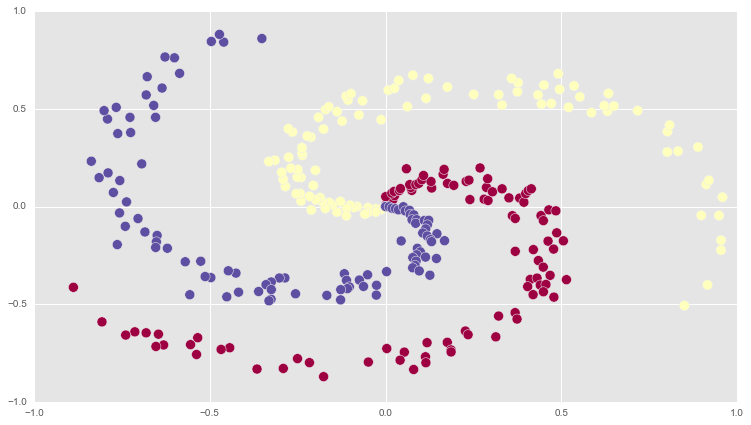

In [38]:
# generate some synthetic data 
# modified version given in http://cs.stanford.edu/people/karpathy/cs231nfiles/minimal_net.html
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X_data = np.zeros((N*K,D))
y_data = np.zeros(N*K, dtype='uint8')
for j in xrange(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N)
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X_data[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y_data[ix] = j
fig = plt.figure()
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

epoch: 0  cost: 1.089877
epoch: 100  cost: 0.817562
epoch: 200  cost: 0.786621
epoch: 300  cost: 0.779160
epoch: 400  cost: 0.776784
epoch: 500  cost: 0.775917
epoch: 600  cost: 0.775577
epoch: 700  cost: 0.775437
epoch: 800  cost: 0.775378
epoch: 900  cost: 0.775353
training set accuracy: 0.493333


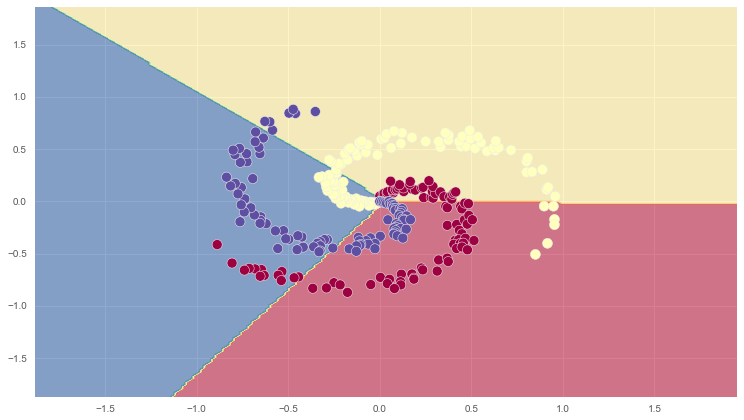

In [39]:
# creating placeholders for X and y
X = tf.placeholder("float", shape=[None, 2])
y = tf.placeholder("float", shape=[None, 3])

one_hot = np.zeros((N*K, 3))
one_hot[range(N*K), y_data] = 1

epochs =  1000
learning_rate = 0.001
print_loss_in_steps = 100


# creating model parameters
W = tf.Variable(tf.zeros([2, 3]))
b = tf.Variable(tf.zeros([3]))

output = tf.nn.softmax(tf.matmul(X, W) +  b)
loss = -tf.reduce_sum(y*tf.log(output))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as session:
    session.run(tf.initialize_all_variables())
    for i in range(epochs):
        optimizer.run(feed_dict={X:X_data, y:one_hot})
        cost = session.run(loss, feed_dict={X:X_data, y:one_hot})/(N*K)
        if i % print_loss_in_steps == 0:
            print "epoch: %d  cost: %f" %(i, cost)
    correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(one_hot,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "training set accuracy: %f" %(accuracy.eval({X: X_data, y: one_hot}))
    
    
    h = 0.02
    x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], session.run(W)) + session.run(b)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

## Shallow neural network

epoch: 0  cost: 1.637934
epoch: 100  cost: 0.271688
epoch: 200  cost: 0.211636
epoch: 300  cost: 0.176947
epoch: 400  cost: 0.153907
epoch: 500  cost: 0.137508
epoch: 600  cost: 0.125150
epoch: 700  cost: 0.115441
epoch: 800  cost: 0.107521
epoch: 900  cost: 0.100903
training set accuracy: 0.980000


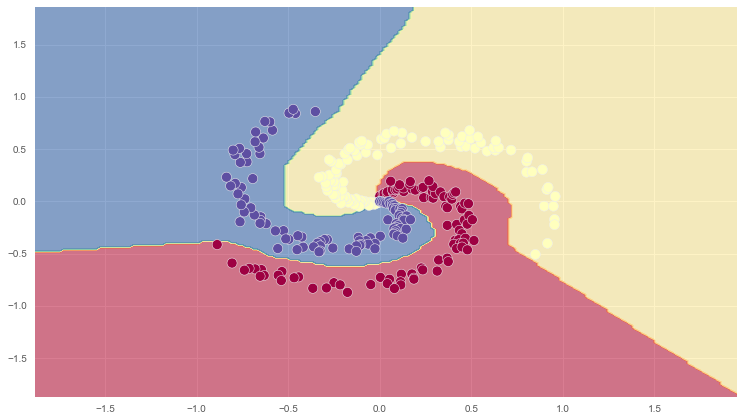

In [40]:
#creating placeholders for X and y
X = tf.placeholder("float", shape=[None, 2])
y = tf.placeholder("float", shape=[None, 3])

one_hot_vector = np.zeros((N*K, 3))
one_hot_vector[range(N*K), y_data] = 1

epochs =  1000
hidden_size = 50
print_loss_in_steps = 100
learning_rate = 0.001

# creating model parameters
W1 = tf.Variable(tf.random_normal([2, hidden_size]))
b1 = tf.Variable(tf.zeros([hidden_size]))

W2 = tf.Variable(tf.random_normal([hidden_size, 3]))
b2 = tf.Variable(tf.zeros([3]))

hidden = tf.nn.relu(tf.matmul(X, W1) + b1)
output = tf.nn.softmax(tf.matmul(hidden, W2) +  b2)
loss = -tf.reduce_sum(y*tf.log(output))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as session:
    session.run(tf.initialize_all_variables())
    for i in range(epochs):
        optimizer.run(feed_dict={X:X_data, y:one_hot_vector})
        cost = session.run(loss, feed_dict={X:X_data, y:one_hot_vector})/(N*K)
        if i % print_loss_in_steps == 0:
            print "epoch: %d  cost: %f" %(i, cost)
    
    hidden = tf.nn.relu(tf.matmul(X, W1) + b1)
    output = tf.matmul(hidden, W2) +  b2
    correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(one_hot_vector,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "training set accuracy: %f" %(accuracy.eval({X: X_data, y: one_hot_vector}))
    
    
    h = 0.02
    x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], session.run(W1)) + 
                                    session.run(b1)), session.run(W2)) + session.run(b2)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

## K-means clustering

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [21]:
%matplotlib inline

Start off by defining some hyperparameters.

In [22]:
num_vectors = 1000
num_clusters = 3
num_steps = 100

Generate some sample data as a list of random 2D vectors from two overlapping normal distributions

In [23]:
vector_values = []
for i in xrange(num_vectors):
    if np.random.random() > 0.5:
        vector_values.append([np.random.normal(0.5, 0.6),
                              np.random.normal(0.3, 0.9)])
    else:
        vector_values.append([np.random.normal(2.5, 0.4),
                         np.random.normal(0.8, 0.5)])

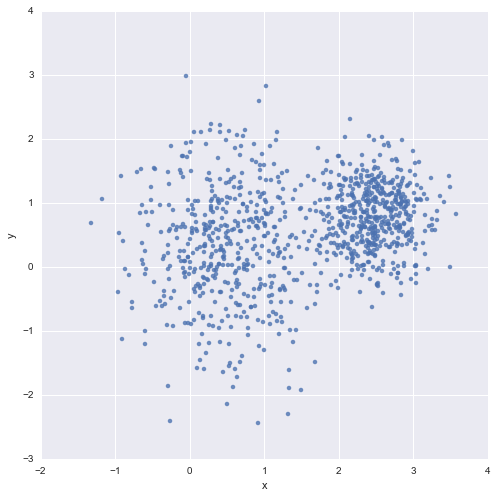

In [24]:
df = pd.DataFrame({"x": [v[0] for v in vector_values], 
                   "y": [v[1] for v in vector_values]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=7)

Let's start building our k-means TensorFlow graph with a few simple operators:
- Store our vector input values in a 2D tensor constant.
- Randomly shuffle the input vectors and then slice off the first num_cluster vectors as a 2D tensor and store the result in a Variable.

In [25]:
vectors = tf.constant(vector_values)
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), 
                                 [0,0],[num_clusters,-1]))

Here's where things get a little more complicated. We extend both of our 2D tensors into 3 dimensions so that we can do an element-wise subtraction between them. This would be pretty straight-forward except that these two tensors have completely different sizes.

In [26]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print expanded_vectors.get_shape()
print expanded_centroids.get_shape()

TensorShape([Dimension(1), Dimension(1000), Dimension(2)])
TensorShape([Dimension(3), Dimension(1), Dimension(2)])


However, because of the shape broadcasting feature in Tensorflow, the tf.sub operators is still able to figure out how to do the element-wise subtraction between the two tensors. That allows us to calculate the squared Euclidian distances (no need to take the square-root) and determine the cluster assignments for every vector and centroid all at once.

In [27]:
distances = tf.reduce_sum(
  tf.square(tf.sub(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)

Once we have the cluster assignments, we can go back through the input vectors and gather all of the members of each cluster and average them together to calculate the new centroids for that cluster.

In [28]:
means = tf.concat(0, [
  tf.reduce_mean(
      tf.gather(vectors, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1])
  for c in xrange(num_clusters)])

Finally, we create an operator which assigns the means, which we just calculated, to the centroids variable so that the next time we run the graph it is using the updated centroids.

We also create a operator to initialize all of our variable before we run the graph.

In [29]:
update_centroids = tf.assign(centroids, means)
init_op = tf.initialize_all_variables()

Here's where we run our graph. For each step in num_steps, we update the centroids and fetch the values of those centroids as well as the cluster assignments for each of our input vectors. TensorFlow will figure out all of the dependencies so that all of the necessary operators in our graph will be evaluated in order to calculate the new centroids.
After all the steps have completed, we display the coordinates of our final centroids.

In [34]:
with tf.Session() as sess:
    sess.run(init_op)
    for step in xrange(num_steps):
        _, centroid_values, assignment_values = sess.run([update_centroids,
                                                      centroids,
                                                      assignments])
    print "centroids"
    print centroid_values

centroids
[[ 0.48565939 -0.46930566]
 [ 2.45395446  0.78782636]
 [ 0.44363374  0.98338723]]


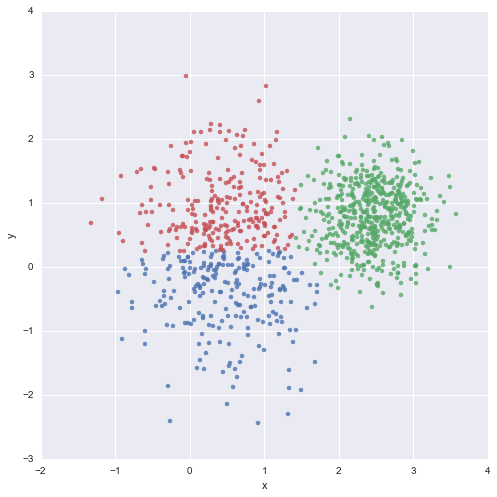

In [35]:
data = {"x": [], "y": [], "cluster": []}
for i in xrange(len(assignment_values)):
    data["x"].append(vector_values[i][0])
    data["y"].append(vector_values[i][1])
    data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, 
           fit_reg=False, size=7, 
           hue="cluster", legend=False)

## Nearest Neighbors

In [41]:
# Import MINST data
import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [42]:
# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

In [43]:
# Reshape images to 1D
Xtr = np.reshape(Xtr, newshape=(-1, 28*28))
Xte = np.reshape(Xte, newshape=(-1, 28*28))

In [44]:
# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

In [45]:
# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.neg(xte))), reduction_indices=1)
# Predict: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.

In [46]:
# Initializing the variables
init = tf.initialize_all_variables()

In [47]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i,:]})
        # Get nearest neighbor class label and compare it to its true label
        print "Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
              "True Class:", np.argmax(Yte[i])
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print "Done!"
    print "Accuracy:", accuracy

Test 0 Prediction: 7 True Class: 7
Test 1 Prediction: 2 True Class: 2
Test 2 Prediction: 1 True Class: 1
Test 3 Prediction: 0 True Class: 0
Test 4 Prediction: 4 True Class: 4
Test 5 Prediction: 1 True Class: 1
Test 6 Prediction: 4 True Class: 4
Test 7 Prediction: 9 True Class: 9
Test 8 Prediction: 8 True Class: 5
Test 9 Prediction: 9 True Class: 9
Test 10 Prediction: 0 True Class: 0
Test 11 Prediction: 0 True Class: 6
Test 12 Prediction: 9 True Class: 9
Test 13 Prediction: 0 True Class: 0
Test 14 Prediction: 1 True Class: 1
Test 15 Prediction: 5 True Class: 5
Test 16 Prediction: 4 True Class: 9
Test 17 Prediction: 7 True Class: 7
Test 18 Prediction: 3 True Class: 3
Test 19 Prediction: 4 True Class: 4
Test 20 Prediction: 9 True Class: 9
Test 21 Prediction: 6 True Class: 6
Test 22 Prediction: 6 True Class: 6
Test 23 Prediction: 5 True Class: 5
Test 24 Prediction: 4 True Class: 4
Test 25 Prediction: 0 True Class: 0
Test 26 Prediction: 7 True Class: 7
Test 27 Prediction: 4 True Class: 4
Te

# Skflow
Sci-kit learn interface for training TensorFlow models

## Linear Classifier

In [2]:
import skflow
from sklearn import datasets, metrics

iris = datasets.load_iris()
classifier = skflow.TensorFlowLinearClassifier(n_classes=3)
classifier.fit(iris.data, iris.target)
score = metrics.accuracy_score(classifier.predict(iris.data), iris.target)
print("Accuracy: %f" % score)

Step #1, avg. loss: 0.83848
Step #6, avg. loss: 0.79506
Step #11, avg. loss: 0.94325
Step #16, avg. loss: 0.65467
Step #21, avg. loss: 0.59065
Step #26, avg. loss: 0.65901
Step #31, avg. loss: 0.69897
Step #36, avg. loss: 0.67406
Step #41, avg. loss: 0.62040
Step #46, avg. loss: 0.64025
Accuracy: 0.666667


## Linear Regressor

In [8]:
import skflow
from sklearn import datasets, metrics, preprocessing

boston = datasets.load_boston()
X = preprocessing.StandardScaler().fit_transform(boston.data)
regressor = skflow.TensorFlowLinearRegressor()
regressor.fit(X, boston.target)
score = metrics.mean_squared_error(regressor.predict(X), boston.target)
print ("MSE: %f" % score)

Step #1, avg. loss: 721.42493
Step #6, avg. loss: 551.94360
Step #11, avg. loss: 420.82623
Step #16, avg. loss: 335.78204
Step #21, avg. loss: 322.84650
Step #26, avg. loss: 261.69098
Step #31, avg. loss: 220.50461
Step #36, avg. loss: 160.86534
Step #41, avg. loss: 151.91495
Step #46, avg. loss: 115.30452
MSE: 82.459702


## Deep Neural Network 

In [9]:
import skflow
from sklearn import datasets, metrics

iris = datasets.load_iris()
classifier = skflow.TensorFlowDNNClassifier(hidden_units=[10, 20, 10], n_classes=3)
classifier.fit(iris.data, iris.target)
score = metrics.accuracy_score(classifier.predict(iris.data), iris.target)
print("Accuracy: %f" % score)

Step #1, avg. loss: 1.95578
Step #6, avg. loss: 1.43943
Step #11, avg. loss: 1.19190
Step #16, avg. loss: 1.07484
Step #21, avg. loss: 0.96688
Step #26, avg. loss: 0.98163
Step #31, avg. loss: 0.93504
Step #36, avg. loss: 0.62121
Step #41, avg. loss: 0.78237
Step #46, avg. loss: 0.56841
Accuracy: 0.666667
